# Numpy e Scipy Stats

In [ ]:
import numpy as np
np.random.rand() # restituisce un array su cui si possono eseguire operazioni come la media, std

0.9253454368487323

In [ ]:
np.random?

definizione di random: frequenze che dipendono dalla distribuzione in considerazione!

rand --> distribuzione uniforme: ogni numero tra 0 e 1 appare con la stessa frequenza

randn --> distribuzione gaussiana normale, media zero e STD 1

In [12]:
def gaussian(x, mu, sig):
  ''' Gaussian distribution with mean mu and variance sig '''
  return 1/np.sqrt(2*np.pi)/sig * (np.exp(-((x - mu)/sig)**2 / 2))

# restituisce un array di floats se si passa un array 

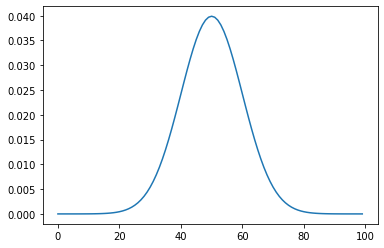

In [ ]:
import pylab as pl
x = np.arange(100)
mu = 50
sig = 10
# gaussian(x, mu, sig)
pl.plot(x, gaussian(x, mu, sig))

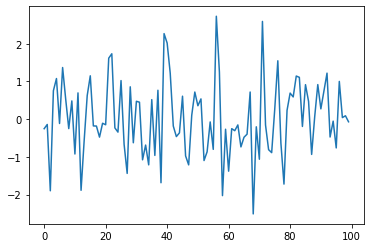

In [ ]:
pl.plot(x, np.random.randn(100))

(array([ 1.,  4.,  9., 12., 19., 16., 22.,  6.,  6.,  5.]),
 array([-2.68633162, -2.17389   , -1.66144837, -1.14900674, -0.63656512,
        -0.12412349,  0.38831813,  0.90075976,  1.41320138,  1.92564301,
         2.43808463]),
 <a list of 10 Patch objects>)

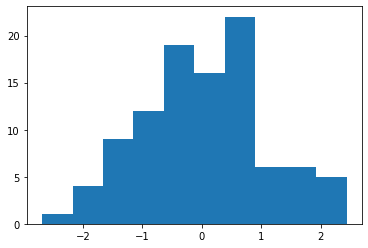

In [ ]:
pl.hist(np.random.randn(100)) # per ottenere una gaussiana

(array([  7.,  19.,  54., 149., 216., 250., 178.,  81.,  37.,   9.]),
 array([ 68.79494861,  74.82610628,  80.85726394,  86.88842161,
         92.91957928,  98.95073695, 104.98189462, 111.01305229,
        117.04420996, 123.07536763, 129.1065253 ]),
 <a list of 10 Patch objects>)

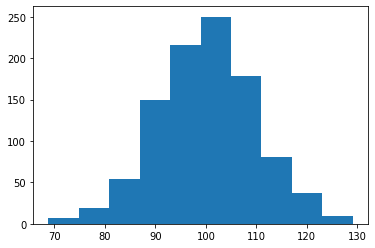

In [ ]:
pl.hist(np.random.randn(1000) * 10 + 100) # media 100 e std 10

In [ ]:
import scipy as sp
from scipy import stats

In [ ]:
sp.stats.norm.rvs? # standard distribution
sp.stats.norm.rvs(100, size = (10,2)) # il primo valore stabilisce la media

array([[ 99.6547362 , 102.71461346],
       [ 99.1208505 ,  98.94312397],
       [101.35723591,  98.60104727],
       [100.67075189,  99.81128718],
       [100.22780631,  99.92511846],
       [ 99.82934497,  99.44325724],
       [101.1938276 , 101.29335932],
       [100.38280646, 102.44841279],
       [100.31253734,  99.76887542],
       [ 99.39332453, 100.71875552]])

random: estrarre numeri da una distibuzione già implementata

assegnando un seme, la distribuzione che si ottiene è sempre la stessa e questo consente la riproducibilità dei dati

nella documentazione è spiegato come utilizzare i seeds

nel machine learning si usano i RandomState, che corrispondono all'impostazione di un seme

(array([ 2.,  2.,  9., 17., 16., 14., 11., 16.,  8.,  5.]),
 array([ 72.01410895,  77.20506332,  82.39601769,  87.58697206,
         92.77792643,  97.9688808 , 103.15983517, 108.35078955,
        113.54174392, 118.73269829, 123.92365266]),
 <a list of 10 Patch objects>)

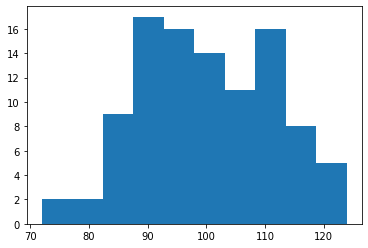

In [ ]:
np.random.seed(123) # si fissa un seme per ottenere sempre la stessa distribuzione
plt.hist(np.random.randn(100) * 10 + 100)

# Dimostrazione teorema del limite centrale

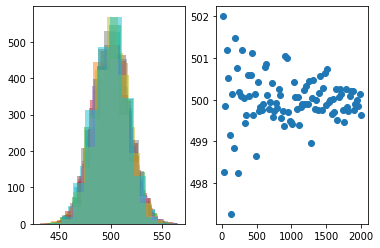

In [ ]:
dim = np.linspace(10,2000,100)
medie = []
fig = pl.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i in dim:
  m = np.random.binomial(1000, 0.5, size = int(i))
  ax1.hist(m, alpha = 0.5)
  medie.append(m.mean())
ax2.plot(dim, medie, 'o')

https://github.com/fedhere/MLPNS2021/blob/main/HW2_distributions/centralLimitTheorem.ipynb

GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.

For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).

Describe the behavior you see in the plots in terms of the law of large numbers.

PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing Extra Credit: FIT a gaussian to the distribution of means

In [ ]:
#from __future__ import print_function

In [1]:
import numpy as np
import pylab as pl
from scipy.optimize import curve_fit, minimize

In [2]:
distributions = ['Poisson', 'Gaussian', 'ChiSquare', 'Cauchy', 'Binomial']
myMean = 100

https://docs.scipy.org/doc/numpy-1.10.4/reference/routines.random.html

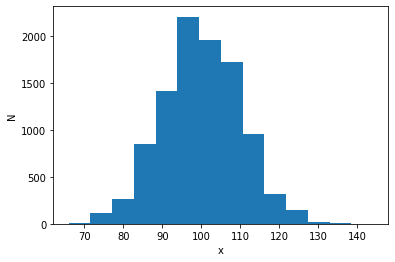

In [3]:
# np.random.poisson?
np.random.seed(109)
d = np.random.poisson(myMean, size = 10000)
m = d.mean()
std = d.std()
pl.hist(d, bins = 14);
pl.xlabel('x');
pl.ylabel('N');

In [4]:
print('Media: %.2f, STD: %.2f'%(m, std))

Media: 99.94, STD: 10.00


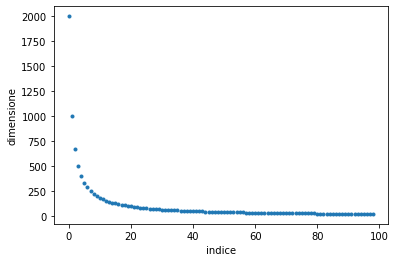

In [5]:
dim = (2000 / np.array(range(1,100))).astype(int) # + distribuzioni a dimensione < perchè più rumorose
pl.plot(dim, '.')
pl.xlabel('indice');
pl.ylabel('dimensione');

In [8]:
md = {} 
md['Poisson'] = {}

for n in dim:
  md['Poisson'][n] = np.random.poisson(myMean, n) # salvo le distribuzioni a diversa dim in un dizionario annidato

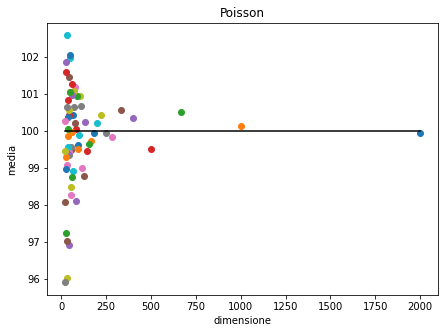

In [9]:
md['Poisson']['Medie'] = {}
PoisFig = pl.figure(figsize = (7,5)).add_subplot(111)

for nn in md['Poisson']: 
  if not type(nn) == str: # le chiavi in Poisson sono le dim e 'Medie'
    md['Poisson']['Medie'][nn] = md['Poisson'][nn].mean()
    PoisFig.plot(nn, md['Poisson']['Medie'][nn], 'o')
PoisFig.plot([min(dim), max(dim)], [myMean, myMean], 'k');
PoisFig.set_title('Poisson');
PoisFig.set_xlabel('dimensione');
PoisFig.set_ylabel('media');

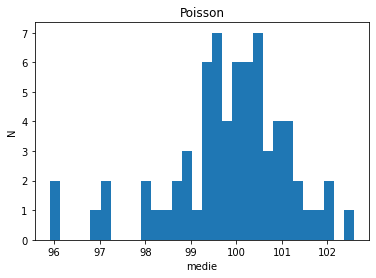

In [10]:
allMeans = list(md['Poisson']['Medie'].values())
h = pl.hist(allMeans, bins = 30);
pl.title('Poisson')
pl.xlabel('medie');
pl.ylabel('N');

In [29]:
print('media: %.2f; STD: %.2f'%(np.mean(allMeans), np.std(allMeans)))

media: 99.85; STD: 1.30


Le medie seguono una distribuzione gaussiana e la media delle medie approssima la media teorica

# Fit

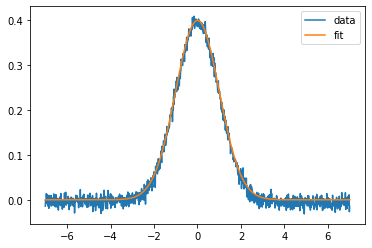

In [26]:
# x = h[1][:-1]
# y = h[0]
x = np.linspace(-7,7,1000)
y = gaussian(x, 0, 1) + (np.random.randn(1000) - 0.5) * 0.01
par = curve_fit(gaussian, x, y)
pl.plot(x, y, label = 'data');
pl.plot(x, gaussian(x, par[0][0], par[0][1]), label = 'fit');
pl.legend();